## Generate an AWS costs chart

AWS costs are downloaded via the AWS costs explorer API. The adapter creates a simpler
'costs' view which we use to build our chart.

The main logic is grouping by service but bucketing small-value services into an "other" category.

In [1]:
$AWS=SELECT  case
    WHEN service like '%Redshift%' then 'Redshift'
    WHEN service like '%Compute Cloud%' then 'EC2'
    WHEN service like '%SageMaker%' then service
    WHEN service like '%Relational Database Service%' then 'RDS'
    WHEN service like '%Simple Storage Service%' then 'S3'
    WHEN service = 'AmazonCloudWatch' then 'CloudWatch'
    WHEN service like '%CloudFront%' then 'CloudFront'
    WHEN service like '%EC2 - Other%' then 'EC2'
    ELSE 'other'
  end as svc_name,
  case 
    WHEN sum(blended) > 10000 then 10000
    ELSE sum(blended)
  end as total,  
  cast("end" as varchar) as end_date
FROM
  awscosts.costs
WHERE
  "end" > now() - interval 30 day
GROUP BY
  svc_name, "end"
ORDER BY
  "end", total desc


171 rows

svc_name,total,end_date
RDS,1195.81,2022-08-14
Redshift,1164.88,2022-08-14
S3,573.13,2022-08-14
other,403.87,2022-08-14
CloudWatch,401.90,2022-08-14
EC2,308.87,2022-08-14
CloudFront,199.94,2022-08-14
Redshift,1149.34,2022-08-15
RDS,1082.27,2022-08-15
S3,504.31,2022-08-15


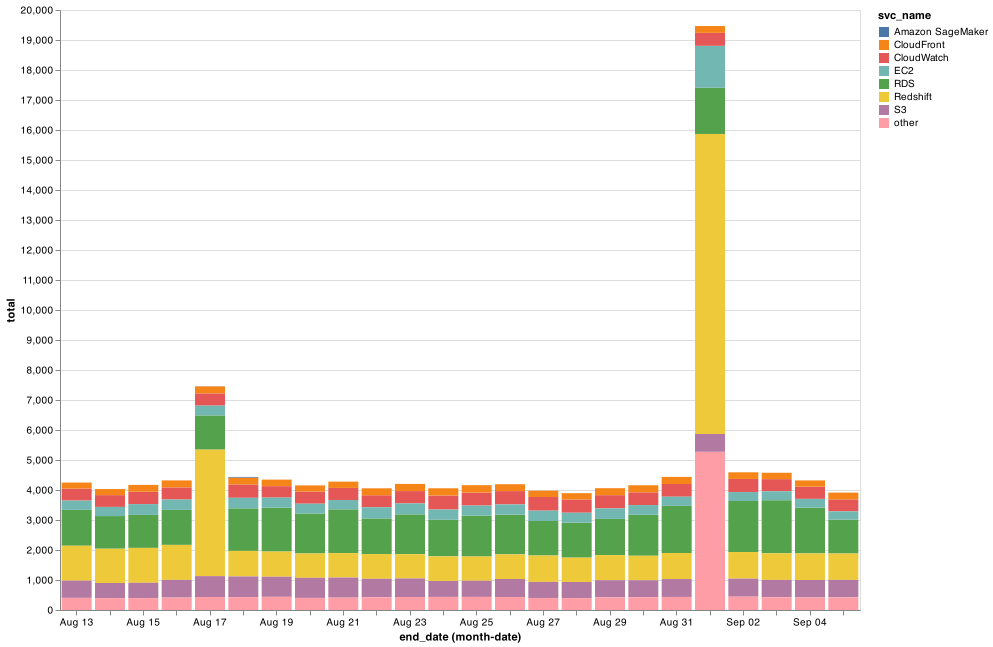

In [3]:
create chart as bar_chart where x = 'monthdate(end_date):O' and y = total and color = svc_name

In [3]:
email chart to 'scottp@berkeleyzone.net' subject 'AWS Costs report'

In [4]:
run every day starting at 09:15

Scheduled to run notebook aws_costs.ipynb